# Notebook 6 - Working with Polygons and Style Files

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present how to load QGIS style files (QML files) into `GemGIS`, how to set the colors for [GeoPandas](https://geopandas.org/) plots and how to automatically set the surface colors for a [GemPy](https://github.com/cgre-aachen/gempy) model. 

- [What is a QML file?](#qml)
- [What is GeoPandas?](#gpd)
- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)

- [Example 1 - Load Style File and plot Polygons](#ex1)
- [Example 2 - Create GemPy Model with Style File](#ex2)

<a id='vector'></a>
## What is a QML File?

QML is an XML format for storing layer styling. A QML file contains all the information QGIS can handle for the rendering of feature geometries including symbol definitions, sizes and rotations, labelling, opacity and blend mode and more.


Sources: https://docs.qgis.org/3.4/en/docs/user_manual/appendices/qgis_file_formats.html#qml-the-qgis-style-file-format

<a id='gpd'></a>
## What is GeoPandas?

[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by [Pandas](https://pandas.pydata.org/) to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/latest/manual.html). Geopandas further depends on [fiona](https://fiona.readthedocs.io/en/latest/manual.html) for file access and [descartes](https://pypi.org/project/descartes/) and [matplotlib](https://matplotlib.org/) for plotting

For more information see: https://geopandas.org/index.html

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy`is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and a `polarity` values is needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image Source: https://www.geolstuffmnl.com/post/measuring-strike-and-dip

<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data
* `misc.py` - file containing functions for custom tasks 



If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class in later tutorials, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.6.1 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the working with raster files notebook.

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import HTML as html_print
def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Thu Oct 29 19:08:50 2020 Mitteleuropäische Zeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.2
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.1.3
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.7
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.1
--------------------------------------------------------------------------------

<a id='dataclass'></a>
# Creating a simple GemPy Model - GemPy Data Class

As GemGIS is providing functions to more easily create GemPy Models, a **GemPy Data Class** is being introduced. This class consists of attributes, such as the CRS of all input data, the interfaces, orientations, custom_sections, etc. It can be initiated empty or attributes can be passed during the initiation. During the course of the following notebooks, more and more attributes will be introduced. For more information about GemPy, visit https://docs.gempy.org/ or https://github.com/cgre-aachen/gempy.

## Initiating the class without attributes
Intiating the GemPy Data Class without attributes will set all of them to `None`.

In [3]:
geo_data = gg.GemPyData()

The following attributes are currently available:

In [4]:
vars(geo_data)

{'model_name': None,
 'crs': None,
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Initiating the class with attributes
The data class can also be initiated with attributes. 

In [5]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326', 
                        extent=[0., 972., 0., 1069., 300., 800.], 
                        resolution=[50,50,50],
                        stack={"Strat_Series": ('Sand', 'Ton')},
                        dem='../../gemgis/data/Test1/raster1.tif',
                        surface_colors= {'Ton':'#015482',
                                         'Sand':'#9f0052',
                                         'basement':'#ffbe00'})

In [6]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [0.0, 972.0, 0.0, 1069.0, 300.0, 800.0],
 'resolution': [50, 50, 50],
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': {'Strat_Series': ('Sand', 'Ton')},
 'dem': '../../gemgis/data/Test1/raster1.tif',
 'surface_colors': {'Ton': '#015482',
  'Sand': '#9f0052',
  'basement': '#ffbe00'},
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'model_width': 972.0,
 'model_length': 1069.0,
 'model_depth': 500.0,
 'model_area': 1039068.0,
 'model_volume': 519534000.0,
 'cell_width': 19.44,
 'cell_length': 21.38,
 'cell_depth': 10.0,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Inspecting the attributes GemPy Data Class
These attributes can now be inspected. 

In [7]:
geo_data.model_name

'Model1'

In [8]:
geo_data.crs

'EPSG:4326'

In [9]:
geo_data.extent

[0.0, 972.0, 0.0, 1069.0, 300.0, 800.0]

In [10]:
geo_data.resolution

[50, 50, 50]

In [11]:
geo_data.stack

{'Strat_Series': ('Sand', 'Ton')}

In [12]:
geo_data.dem

'../../gemgis/data/Test1/raster1.tif'

In [13]:
geo_data.surface_colors

{'Ton': '#015482', 'Sand': '#9f0052', 'basement': '#ffbe00'}

<a id='ex1'></a>
# Example 1 - Load Style File and plot Polygons

For this first example, we are going to load a QGIS QML file and convert it to a list of colors that can be used to plot the polygons of the geological map using GeoPandas.

## Loading Geological Map

Loading the raster of the geological map for easy visualization and loading a polygon shape file.

In [14]:
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')
geolmap = gpd.read_file('../../gemgis/data/Test1/geolmap1.shp')

In [15]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

In [16]:
geo_data.raw_i = geolmap
geo_data.raw_i

,id,formation,geometry
0,None,Sand1,"POLYGON ((0.256 264.862, 10.593 276.734, 17.13..."
1,None,Ton,"POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ..."
2,None,Sand2,"POLYGON ((0.188 495.787, 0.249 1068.760, 278.5..."
3,None,Sand2,"POLYGON ((511.675 1068.852, 971.698 1068.800, ..."


## Setting the extent

In [17]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Loading Style File

Loading a QML style file. The GeoDataFrame of the plotted polygons have to be provided to create a list of colors. These colors are equal to `unique()` formations the geological map contains.

In [18]:
cols = gg.utils.load_surface_colors('../../gemgis/data/Test1/style1.qml', geolmap)
cols

['#b35a2a', '#b35a2a', '#525252']

In [19]:
geolmap['formation'].unique()

array(['Sand1', 'Ton', 'Sand2'], dtype=object)

In [20]:
html_print(cstr('brown', cols[0]))

In [21]:
html_print(cstr('gray', cols[2]))

## Plotting the Polygons without colors

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

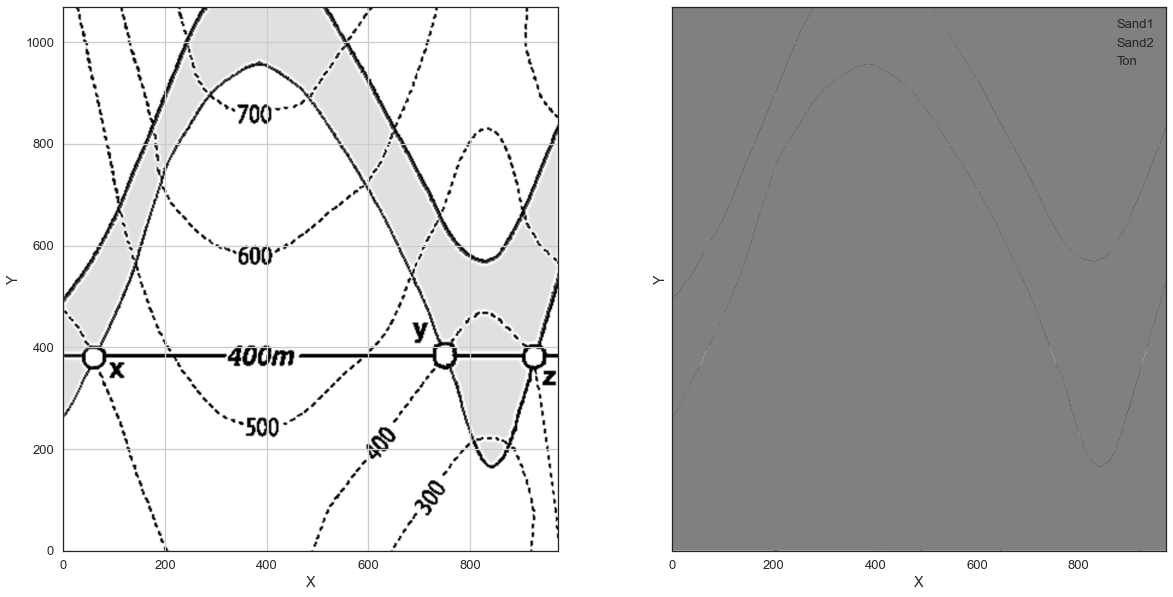

In [22]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_interfaces=True,)

## Plotting the polygons with color

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

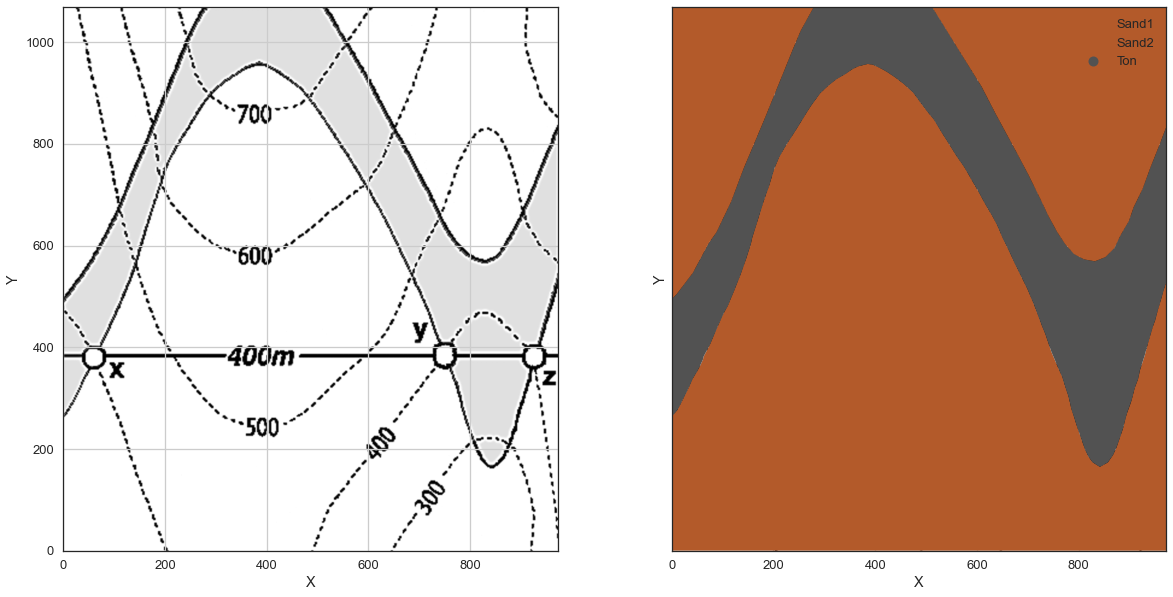

In [23]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_interfaces=True, 
                           cmap_interfaces=cols)

<a id='ex2'></a>
# Example 2 - Create GemPy Model with Style File

`GemGIS` is also capable of creating style dictionaries from QML files that can used for surface colors of a `GemPy`model. 

## Load QML as surface color dict

In [24]:
surface_color_dict = gg.utils.create_surface_color_dict('../../gemgis/data/Test1/style1.qml')
surface_color_dict

{'Sand1': '#b35a2a', 'Sand2': '#b35a2a', 'Ton': '#525252'}

## Create GemPy Data Class

In [25]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326')

### Set Extent

In [26]:
geo_data.set_extent(0,972,0,1069, minz=300, maxz=800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

### Set Resolution

In [27]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

### Load DEM

In [28]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
dem = gg.vector.interpolate_raster(topo, method='rbf')
dem

array([[499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       ...,
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969]])

### Set Interfaces

In [29]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
interfaces_coords = gg.vector.extract_coordinates(interfaces,dem, extent=geo_data.extent)
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces.head()

,index,X,Y,Z,formation
0,0,0.26,264.86,387.24,Sand1
1,1,10.59,276.73,387.15,Sand1
2,2,17.13,289.09,387.38,Sand1
3,3,19.15,293.31,387.52,Sand1
4,4,27.80,310.57,388.63,Sand1


### Set Orientations 

In [30]:
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
orientations_coords = gg.vector.extract_coordinates(orientations,dem,extent=geo_data.extent)
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,96.47,451.56,441.09,Ton,30.50,180.00,1
1,1,172.76,661.88,556.87,Ton,30.50,180.00,1
2,2,383.07,957.76,722.91,Ton,30.50,180.00,1
3,3,592.36,722.70,601.57,Ton,30.50,180.00,1
4,4,766.59,348.47,378.01,Ton,30.50,180.00,1


### Set Layer Stack

In [31]:
geo_data.stack = {"Strat_Series": ('Sand1', 'Ton')}
geo_data.stack

{'Strat_Series': ('Sand1', 'Ton')}

### Set Topography

In [32]:
geo_data.dem = '../../../gemgis/data/examples/example1/raster1.tif'
geo_data.dem

'../../../gemgis/data/examples/example1/raster1.tif'

## Load QML File

In [33]:
geo_data.to_surface_color_dict('../../gemgis/data/Test1/style1.qml', basement='Sand2')
geo_data.surface_colors

{'Sand1': '#b35a2a', 'Ton': '#525252', 'basement': '#b35a2a'}

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [34]:
import sys  
sys.path.append('../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\ale93371\\Anaconda3\\envs\\test_gempy\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [35]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2020-10-29 19:08

In [36]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model1  2020-10-29 19:08

In [37]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Sand1,Default series,1,#015482,1
1,Ton,Default series,2,#9f0052,2


In [38]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Sand1,Strat_Series,1,#015482,1
1,Ton,Strat_Series,2,#9f0052,2
2,basement,Strat_Series,3,#ffbe00,3


In [39]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Sand1,Strat_Series,1,#b35a2a,1
1,Ton,Strat_Series,2,#525252,2
2,basement,Strat_Series,3,#b35a2a,3


A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [40]:
geo_model.set_topography(
    source='gdal', filepath='../../gemgis/data/Test1/raster1.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [41]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1528.90
$C_o$           55655.83
drift equations      [3]


In [42]:
sol = gp.compute_model(geo_model)

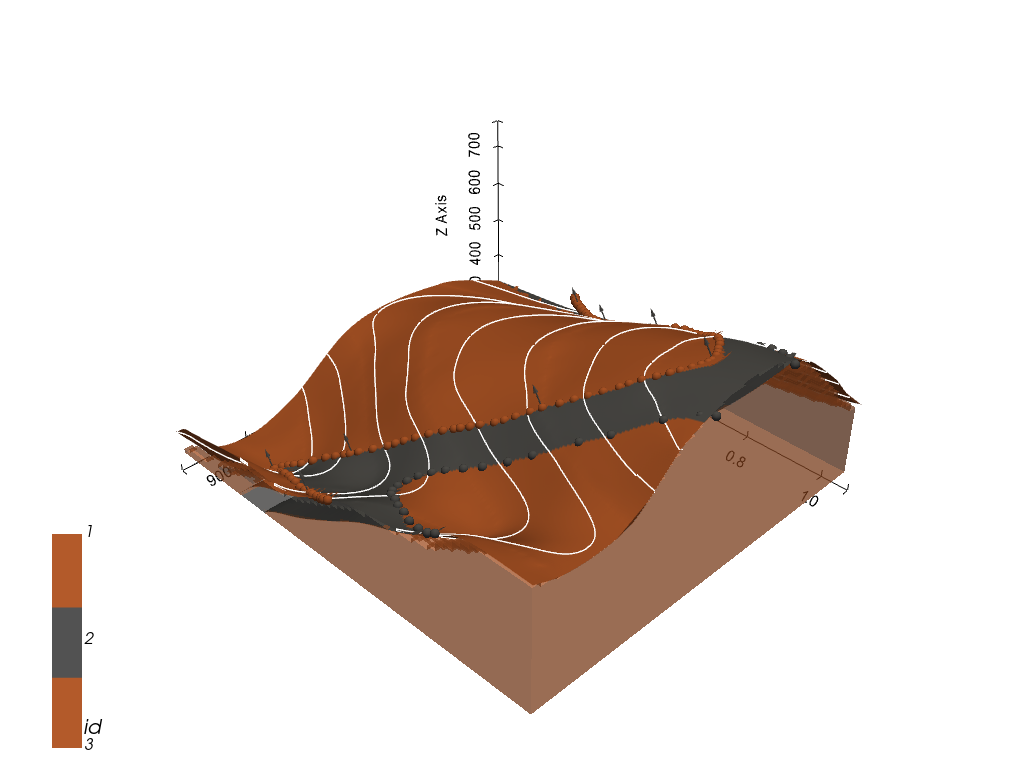

In [43]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

## Create GeoDataFrame with Polygons

In [44]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

,formation,geometry
0,basement,"POLYGON ((3.275 487.853, 5.832 490.003, 7.831 ..."
1,basement,"POLYGON ((826.200 557.320, 830.088 557.545, 83..."
2,Ton,"POLYGON ((2.406 5.831, 3.498 9.718, 4.586 13.6..."
3,Sand1,"POLYGON ((5.832 1.944, 9.720 1.944, 13.608 1.9..."


## Plot Polygons

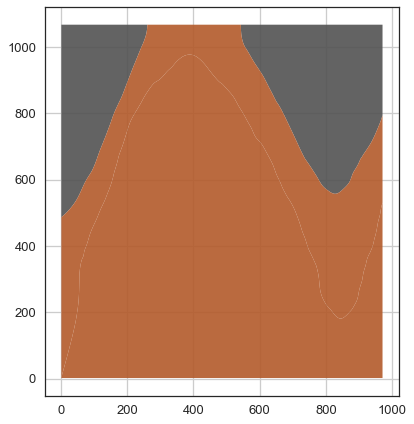

In [45]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9, aspect='equal')
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [46]:
gdf.to_file('../../gemgis/data/examples/example1/liths.shp')